# Storytelling Data Visualization on Exchange Rate
## Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')

## Read in the Dataset and Inspect the Dataset

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Display the five records of the Dataset

In [3]:
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

## Display the last five records of the Dataset

In [4]:
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

## Data Cleaning
### 1. Renaming Columns

In [5]:
new_column_names = []
for column_name in exchange_rates.columns:
    column_name = column_name.replace('[', '')
    column_name = column_name.replace(' ]', '')
    column_name = column_name.replace(' ', '_')
    column_name = column_name.lower()
    new_column_names.append(column_name)
exchange_rates.columns = new_column_names
exchange_rates.rename(columns={'period\\unit:': 'time'}, inplace = True)
exchange_rates.columns

Index(['time', 'australian_dollar', 'bulgarian_lev', 'brazilian_real',
       'canadian_dollar', 'swiss_franc', 'chinese_yuan_renminbi',
       'cypriot_pound', 'czech_koruna', 'danish_krone', 'estonian_kroon',
       'uk_pound_sterling', 'greek_drachma', 'hong_kong_dollar',
       'croatian_kuna', 'hungarian_forint', 'indonesian_rupiah',
       'israeli_shekel', 'indian_rupee', 'iceland_krona', 'japanese_yen',
       'korean_won', 'lithuanian_litas', 'latvian_lats', 'maltese_lira',
       'mexican_peso', 'malaysian_ringgit', 'norwegian_krone',
       'new_zealand_dollar', 'philippine_peso', 'polish_zloty', 'romanian_leu',
       'russian_rouble', 'swedish_krona', 'singapore_dollar',
       'slovenian_tolar', 'slovak_koruna', 'thai_baht', 'turkish_lira',
       'us_dollar', 'south_african_rand'],
      dtype='object')

### 2. Dropping Unnecessary Columns and Change the Datatype of 'time' column

In [6]:
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
euro_to_dollar = exchange_rates[['time', 'us_dollar']]
print(euro_to_dollar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5699 non-null   datetime64[ns]
 1   us_dollar  5699 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 89.2+ KB
None


### 3. Sorting Records

In [7]:
euro_to_dollar = euro_to_dollar.sort_values(['time'])
print(euro_to_dollar.head())

           time us_dollar
5698 1999-01-04    1.1789
5697 1999-01-05    1.1790
5696 1999-01-06    1.1743
5695 1999-01-07    1.1632
5694 1999-01-08    1.1659


### 4. Clean `us_dollar` column and change its datatype

In [8]:
euro_to_dollar['us_dollar'].value_counts(dropna = False)

us_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [9]:
euro_to_dollar['us_dollar'] = euro_to_dollar[euro_to_dollar['us_dollar'] != '-']['us_dollar'].astype('float')
euro_to_dollar.reset_index(drop = True, inplace = True)
euro_to_dollar.dropna(inplace = True)
print(euro_to_dollar.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5637 non-null   datetime64[ns]
 1   us_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB
None


## Rolling Mean

We will calculate the rolling means for the US_dollar column using a moving window of 30 days. We will add the rolling means to a new column named rolling_mean.

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['us_dollar'].rolling(30).mean()
print(euro_to_dollar.head())

        time  us_dollar  rolling_mean
0 1999-01-04     1.1789           NaN
1 1999-01-05     1.1790           NaN
2 1999-01-06     1.1743           NaN
3 1999-01-07     1.1632           NaN
4 1999-01-08     1.1659           NaN


We will show comparatively how the euro-dollar rate changed under the presidency of George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We will use the line plot.

## Plotting EURO-USD Exchange Rates Under the presidency of George W. Bush (2000 - 2008), Barrack Obama (2009 - 2016) and Donald J.Trump (2017 - 2020)

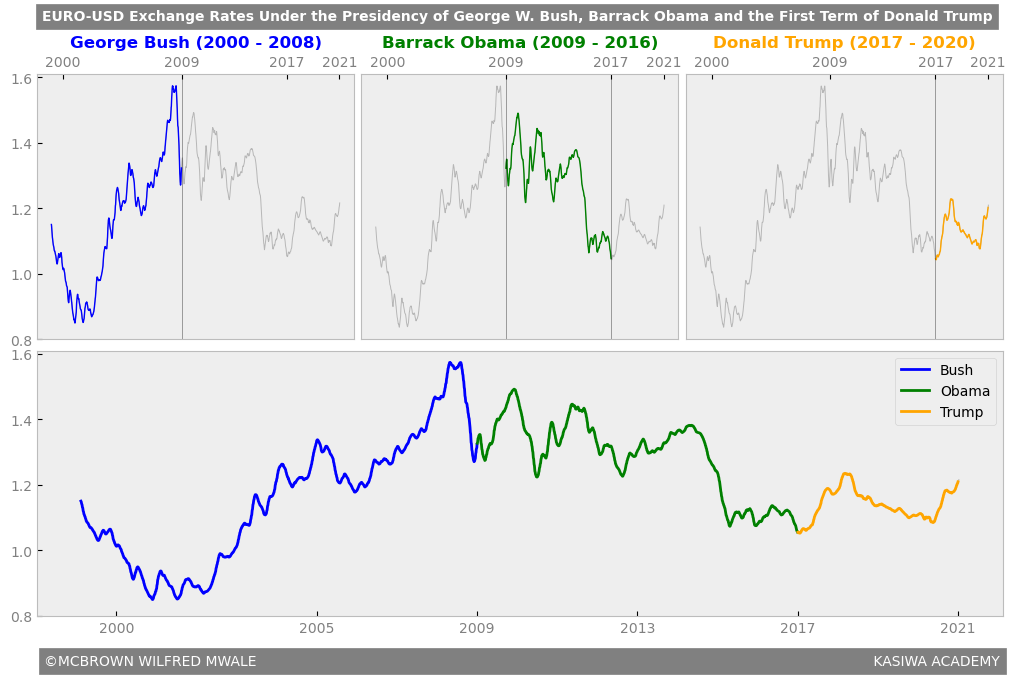

In [11]:
# Initialise a figure
fig = plt.figure(figsize = (10, 6))

# Define subplots
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, (4,6))
axes = [ax1, ax2, ax3, ax4]

# Plot a number line in each subplot
for ax in axes:
    ax.plot(euro_to_dollar['time'], euro_to_dollar['rolling_mean'], color = 'gray', alpha = 0.5, lw = 0.7)
    ax.grid(False)

# George W. Bush (2001 - 2009)
bush_time = euro_to_dollar[(euro_to_dollar['time'].dt.year >= 1999) & (euro_to_dollar['time'].dt.year < 2009)]
ax1.plot(bush_time['time'], bush_time['rolling_mean'], color = 'blue', lw = 1)
ax1.set_title('George Bush (2000 - 2008)', fontdict = {'size':12, 'weight': 'bold', 'color': 'blue'})
ax1.axvline(pd.to_datetime('2009-01-01'), lw = 0.5 , color = 'black', alpha = 0.5)
ax1.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6])
ax1.set_xticks([pd.to_datetime('2000-01-01'), pd.to_datetime('2009-01-01'),
                pd.to_datetime('2017-01-01'), pd.to_datetime('2021-01-01')],
              ['2000', '2009', '2017', '2021'])
ax1.tick_params(labelbottom = False, labeltop = True, bottom = False, top = True, labelcolor = 'gray')

# Barrack Obama (2009 - 2017)
obama_time = euro_to_dollar[(euro_to_dollar['time'].dt.year >= 2009) & (euro_to_dollar['time'].dt.year < 2017)]
ax2.plot(obama_time['time'], obama_time['rolling_mean'], color = 'g', lw = 1)
ax2.set_title('Barrack Obama (2009 - 2016)', fontdict = {'size':12, 'weight': 'bold', 'color': 'g'})
ax2.axvline(pd.to_datetime('2009-01-01'), lw = 0.5 , color = 'black', alpha = 0.5)
ax2.axvline(pd.to_datetime('2017-01-01'), lw = 0.5 , color = 'black', alpha = 0.5)
ax2.set_xticks([pd.to_datetime('2000-01-01'), pd.to_datetime('2009-01-01'),
                pd.to_datetime('2017-01-01'), pd.to_datetime('2021-01-01')],
              ['2000', '2009', '2017', '2021'])
ax2.tick_params(labelbottom = False, labeltop = True, bottom = False, top = True, labelcolor = 'gray')
ax2.set_yticks([])

# Donald J. Trump (2017 - 2021)
trump_time = euro_to_dollar[(euro_to_dollar['time'].dt.year >= 2017) & (euro_to_dollar['time'].dt.year < 2021)]
ax3.plot(trump_time['time'], trump_time['rolling_mean'], color = 'orange', lw = 1)
ax3.set_yticks([])
ax3.set_title('Donald Trump (2017 - 2020)', fontdict = {'size':12, 'weight': 'bold', 'color': 'orange'})
ax3.axvline(pd.to_datetime('2017-01-01'), lw = 0.5 , color = 'black', alpha = 0.5)
ax3.set_xticks([pd.to_datetime('2000-01-01'), pd.to_datetime('2009-01-01'),
                pd.to_datetime('2017-01-01'), pd.to_datetime('2021-01-01')],
              ['2000', '2009', '2017', '2021'])
ax3.tick_params(labelbottom = False, labeltop = True, bottom = False, top = True, labelcolor = 'gray')

# All presidency
ax4.plot(bush_time['time'], bush_time['rolling_mean'], color = 'blue', label = 'Bush')
ax4.plot(obama_time['time'], obama_time['rolling_mean'], color = 'g', label = 'Obama')
ax4.plot(trump_time['time'], trump_time['rolling_mean'], color = 'orange', label = 'Trump')
ax4.legend()
ax4.set_xticks([pd.to_datetime('2000-01-01'), pd.to_datetime('2005-01-01'), pd.to_datetime('2009-01-01'),
                pd.to_datetime('2013-01-01'), pd.to_datetime('2017-01-01'), pd.to_datetime('2021-01-01')],
              ['2000', '2005', '2009', '2013', '2017', '2021'])
ax4.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6])
ax4.tick_params(labelcolor = 'gray')

plt.tight_layout(pad = 0)
plt.text(x = 10280, y = 2.62, s = 'EURO-USD Exchange Rates Under the Presidency of George W. Bush, Barrack Obama and the First Term of Donald Trump',
            fontdict = {'weight':'semibold', 'size': '10', 'color': 'white'}, backgroundcolor = 'gray')

plt.text(x = 10300, y = 0.65, s = '©MCBROWN WILFRED MWALE'+' '*141 + 'KASIWA ACADEMY', backgroundcolor = 'gray', color = 'white')
plt.savefig('euro_usd_exchange_rates.png', bbox_inches = 'tight')

plt.show()